In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from analysis.utils.graph_analysis import *

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = 15, 10

Before running, run analysis/compute_bispectrum.py for 5 and 6 nodes. 
Warning: 6 nodes takes around 2 hours to compute and generates a 10 GB file. 

In [ ]:
bs5 = pd.read_pickle('analysis/output/bispectrum_on_5_nodes')
bs6 = pd.read_pickle('analysis/output/bispectrum_on_6_nodes')

## Find equivalent bispectrums

In [23]:
orbit_assignment, graphs_by_orbit, bs_matches, bs_distance = find_bispectrum_matches(bs5)
bs5['orbit'] = orbit_assignment

In [24]:
bs5.head()

,bispectrum,graph,pca_1,pca_2,tsne_1,tsne_2,orbit
0,"[1.0, 1.4701001596361192e-14, 1.47010015963611...","[[0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 1...",0.691386,-0.132551,12.852818,-8.816066,0
1,"[1.0, 1.4701001596361192e-14, 1.47010015963611...","[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0...",0.691386,-0.132551,12.852900,-8.813467,0
2,"[1.0, 1.470100159636119e-14, 1.470100159636119...","[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1...",0.691386,-0.132551,12.852748,-8.814692,0
3,"[1.0, 1.4701001596361192e-14, 1.47010015963611...","[[0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 1, 0, 0...",0.691386,-0.132551,12.852880,-8.816248,0
4,"[1.0, 1.470100159636119e-14, 1.470100159636119...","[[0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 1, 0, 1...",0.691386,-0.132551,12.852448,-8.814456,0


Warning: takes a long time to compute for 6-node graphs.

In [ ]:
orbit_assignment, graphs_by_orbit, bs_matches, bs_distance = find_bispectrum_matches(bs6)
bs6['orbit'] = orbit_assignment

# 5-node graphs

Binary matrix that is size n_graphs by n_graphs showing whether the bispectrum for each pair of graphs is within epsilon=1e-10. 

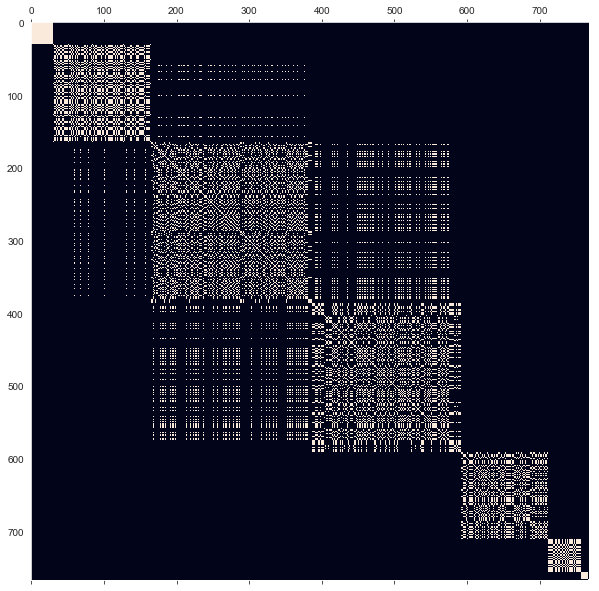

In [19]:
sns.set_style('dark')
plt.matshow(bs_matches)

Showing distance (sum of absolute value of differences) for each pair of graphs

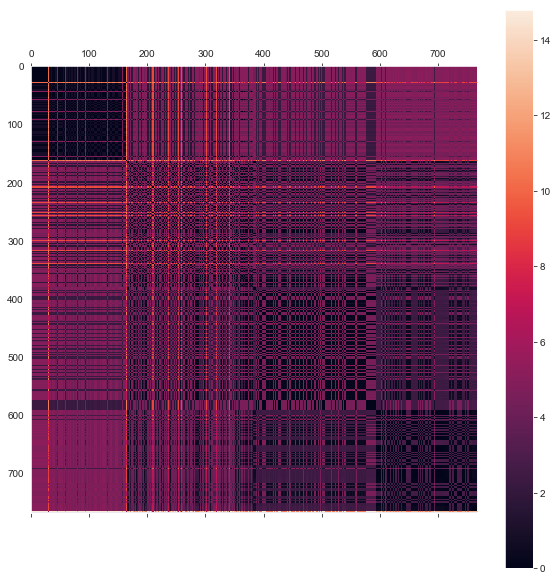

In [27]:
sns.set_style('dark')
plt.matshow(bs_distance)
plt.colorbar()

### Orbits, as discovered by bispectrum

There should be 34 orbits. It appears that the bispectrum is sending some similar but non-isomorphic graphs to the same point in bispectrum space. For example, see orbit 4.

/Users/Sophia/Software/anaconda3/envs/gbs/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


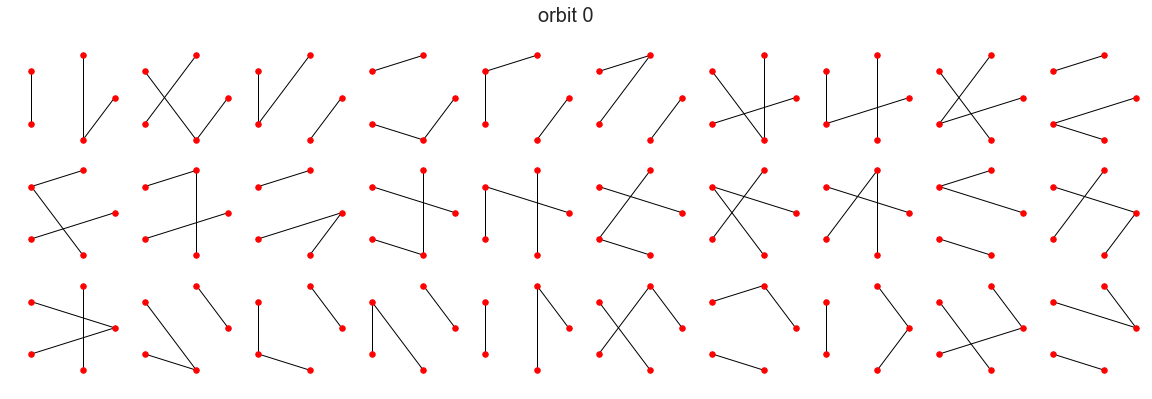

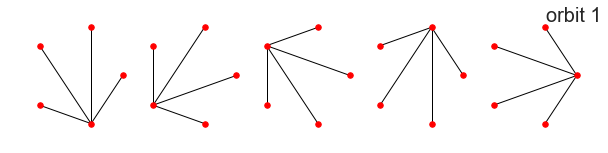

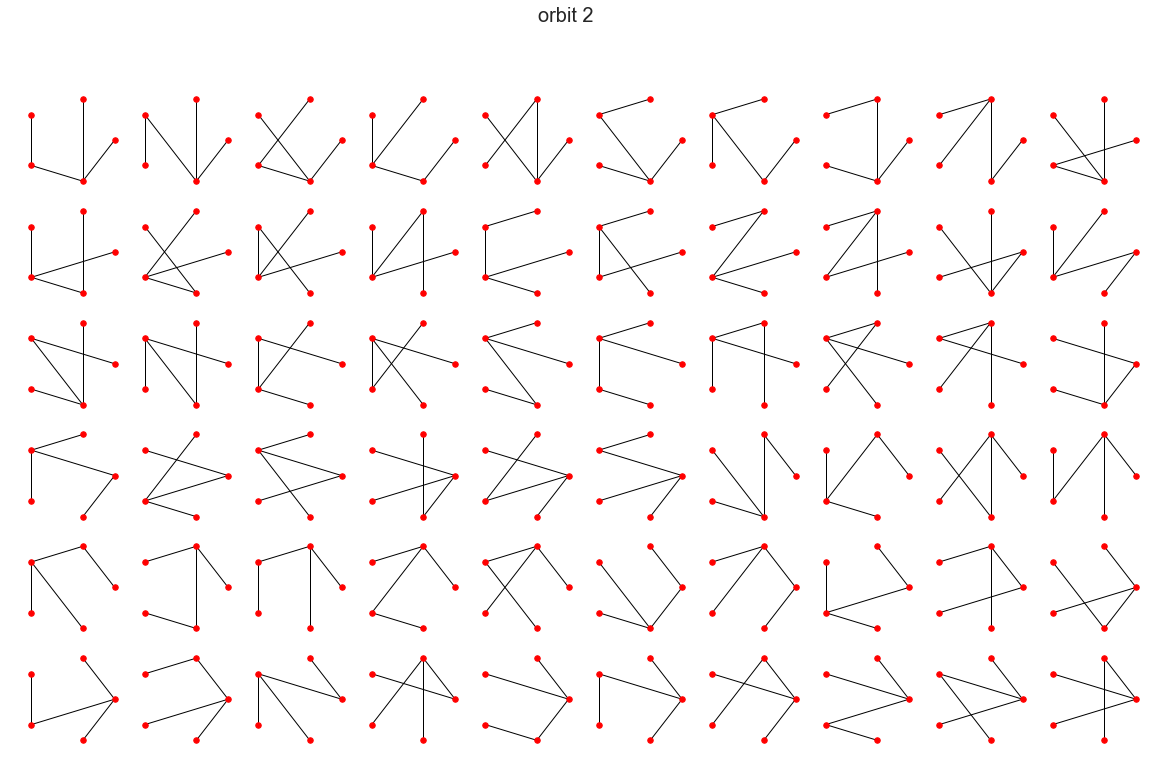

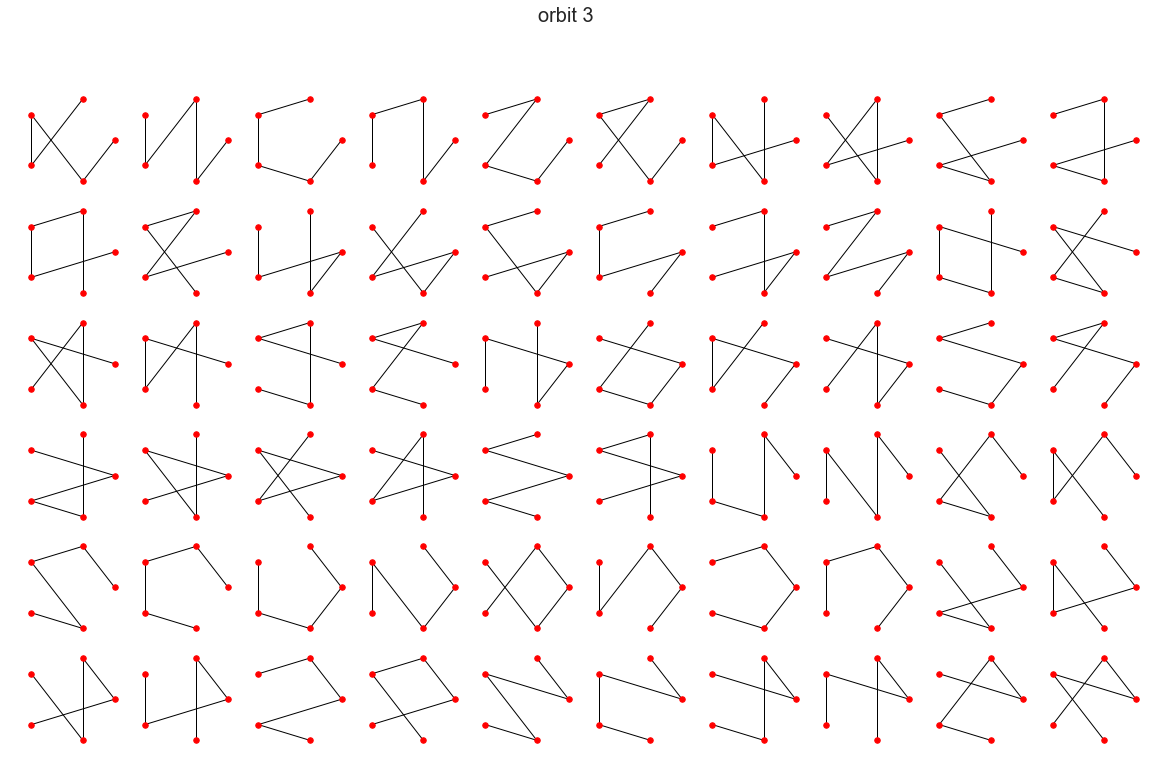

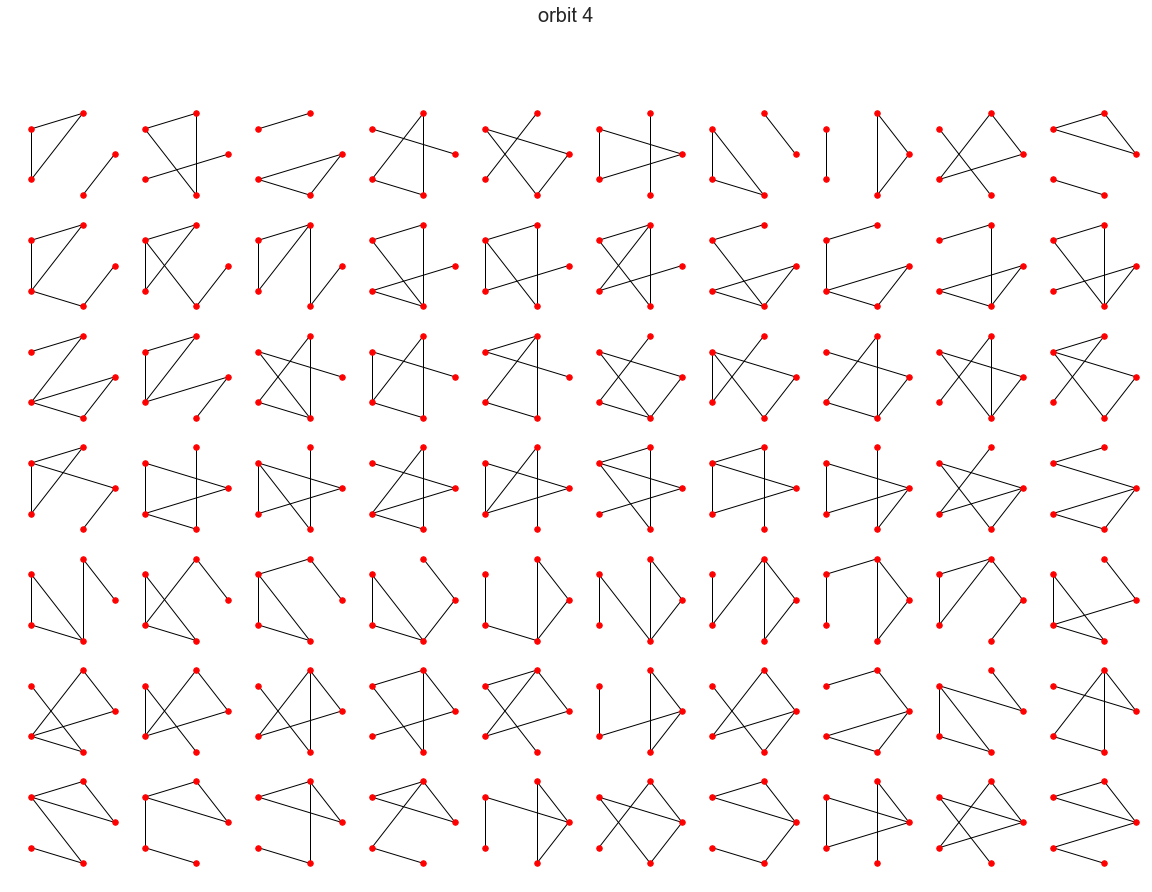

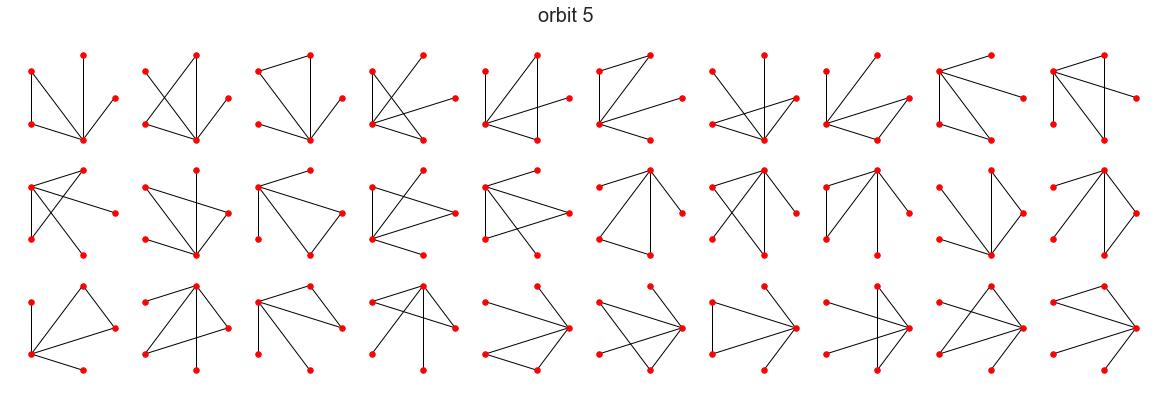

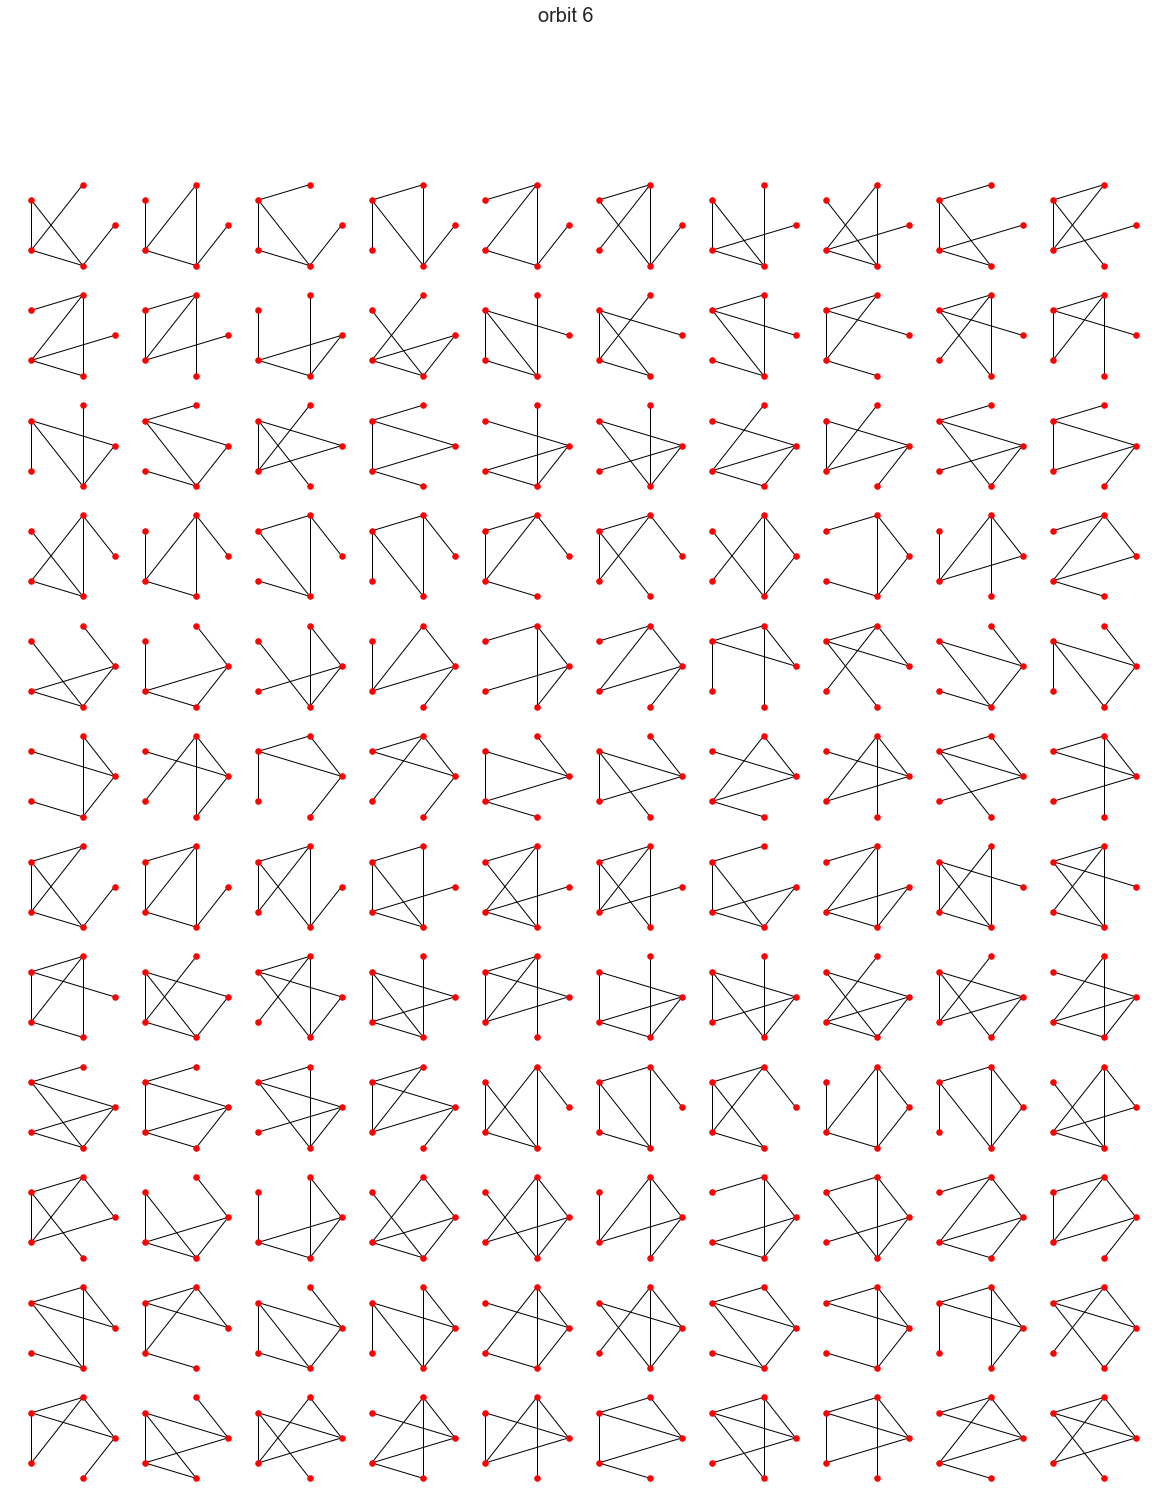

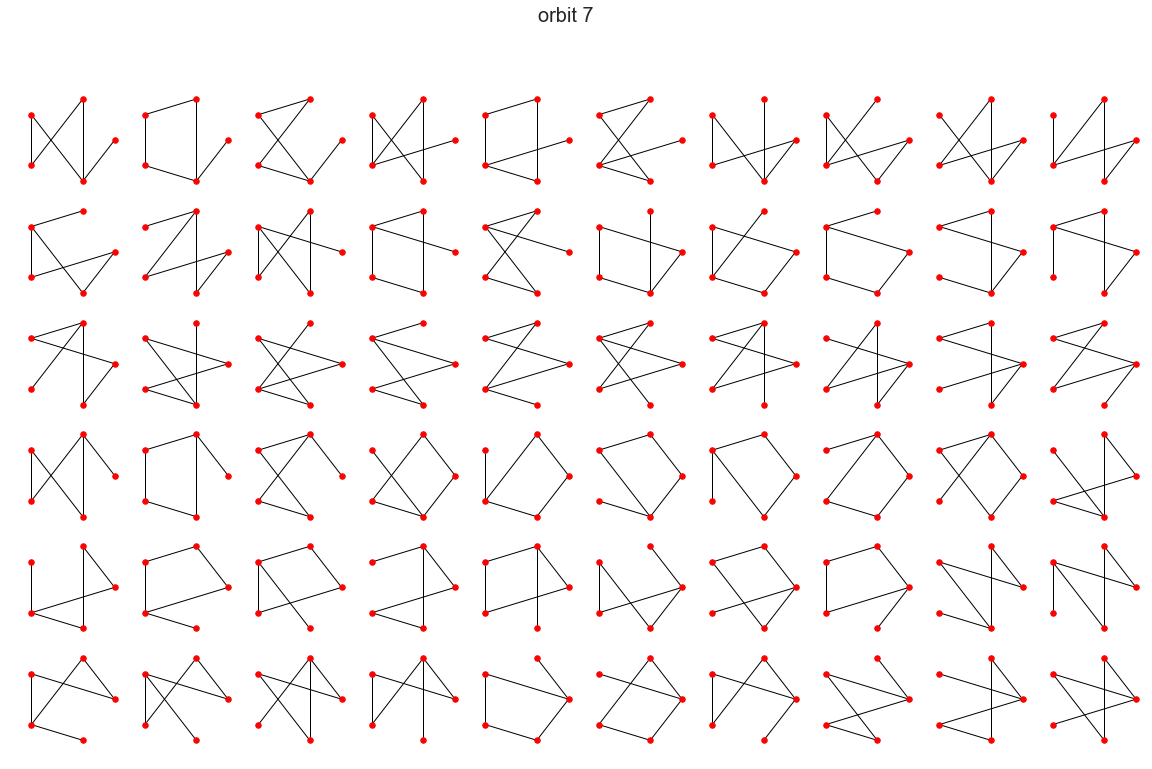

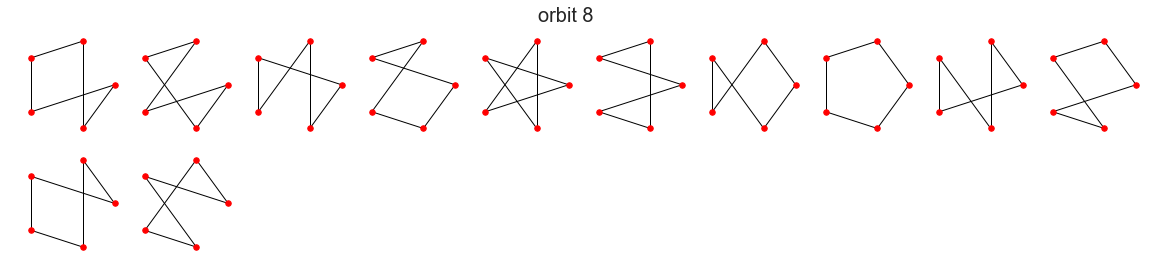

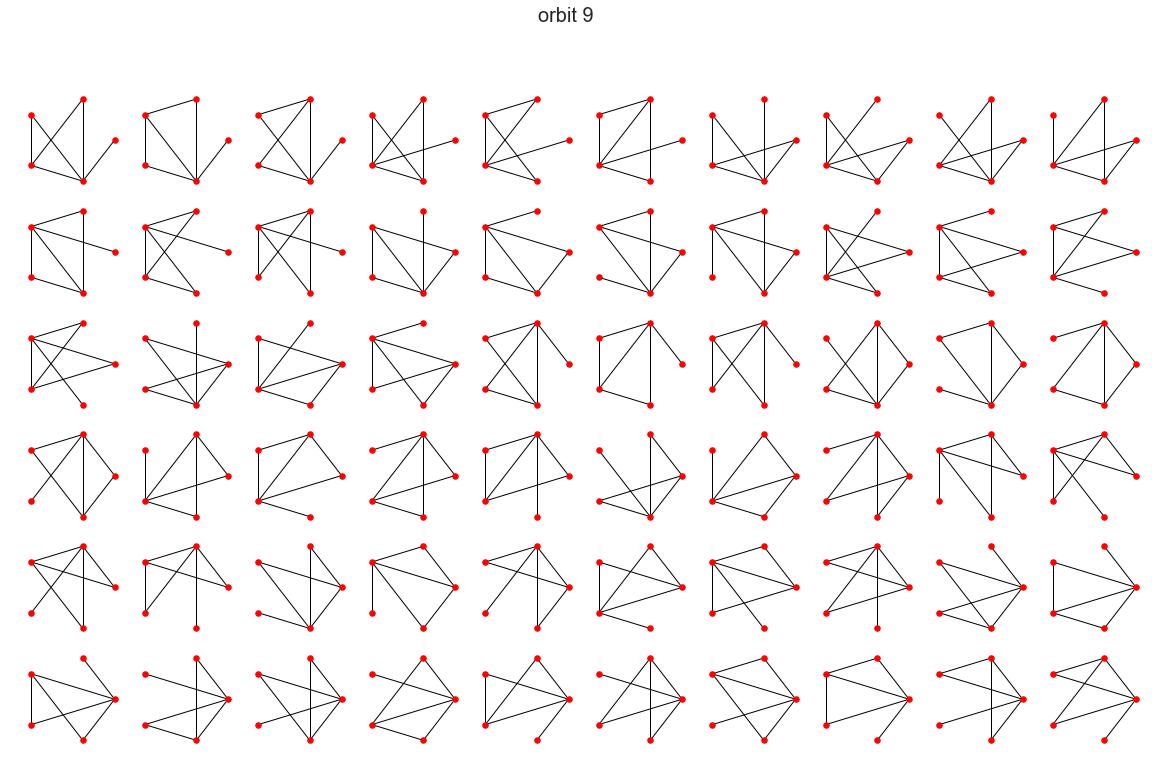

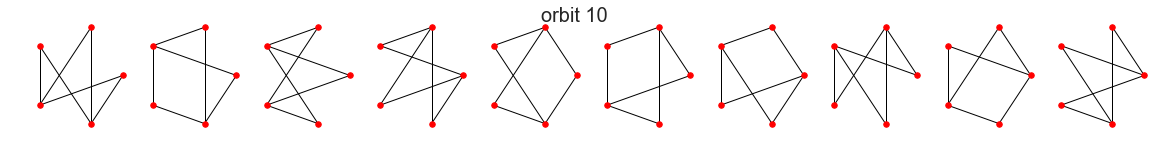

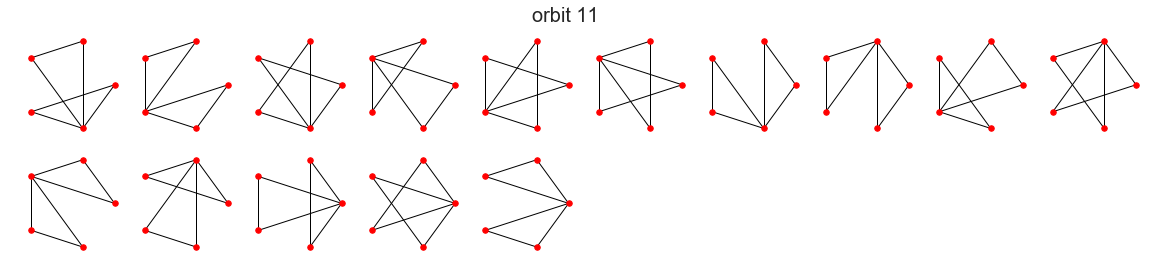

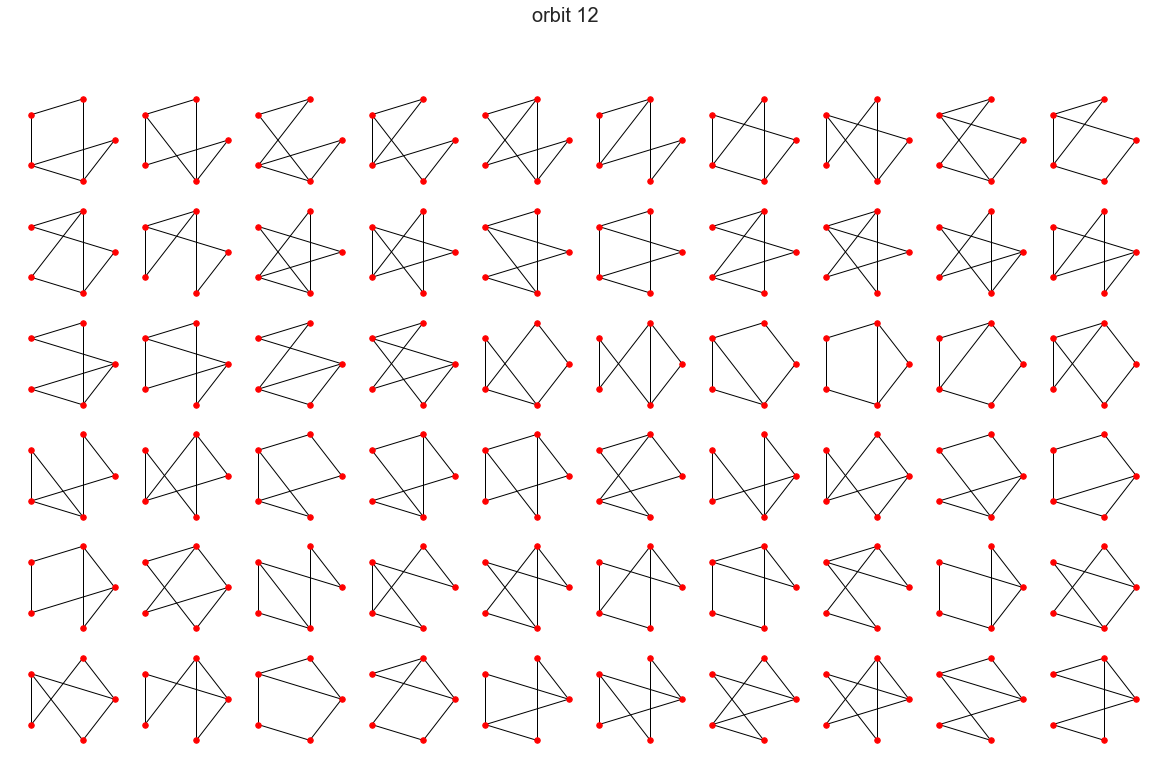

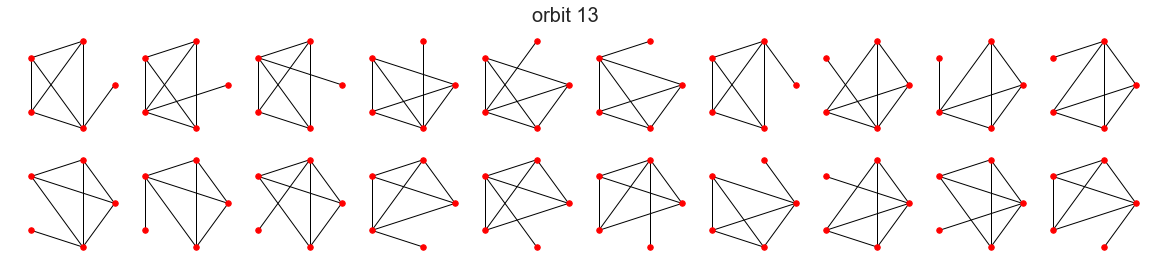

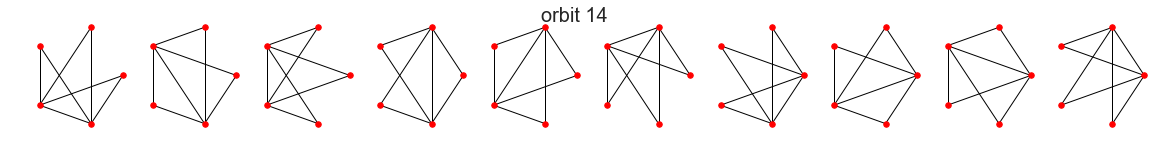

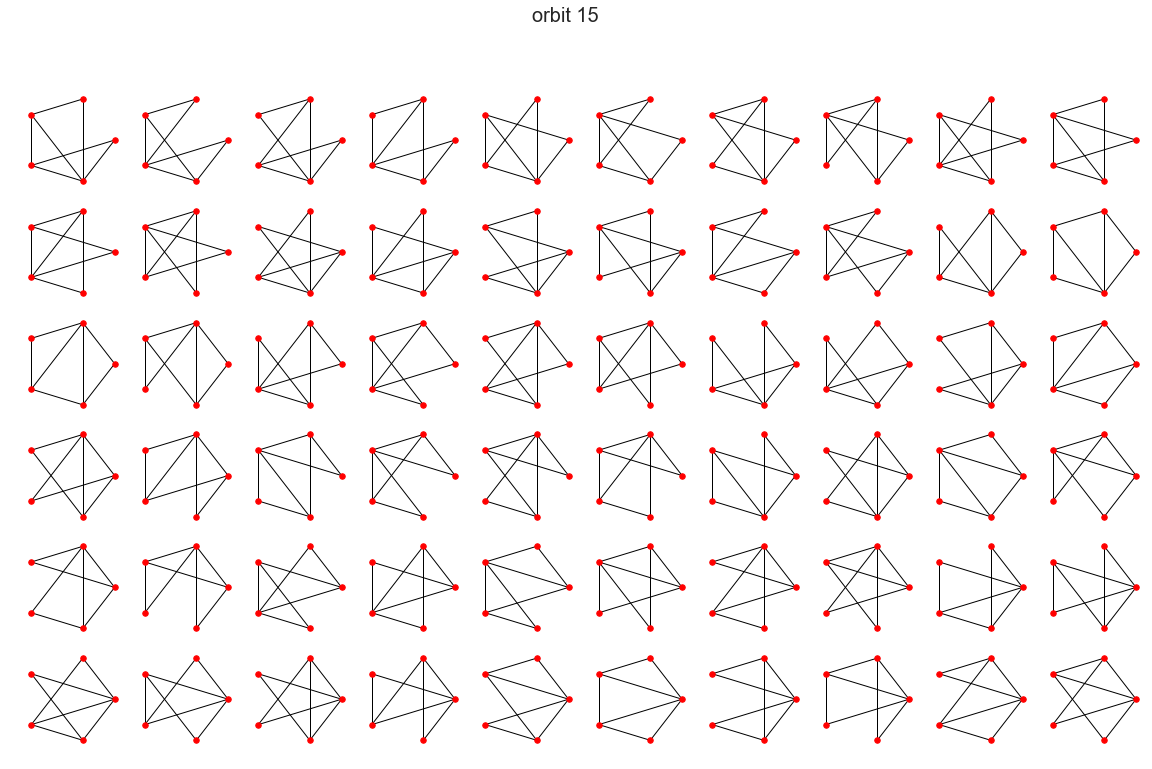

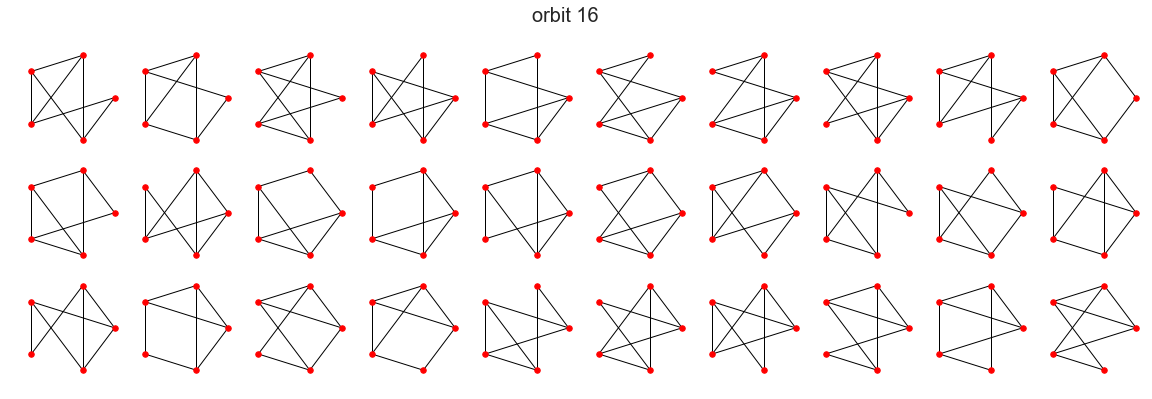

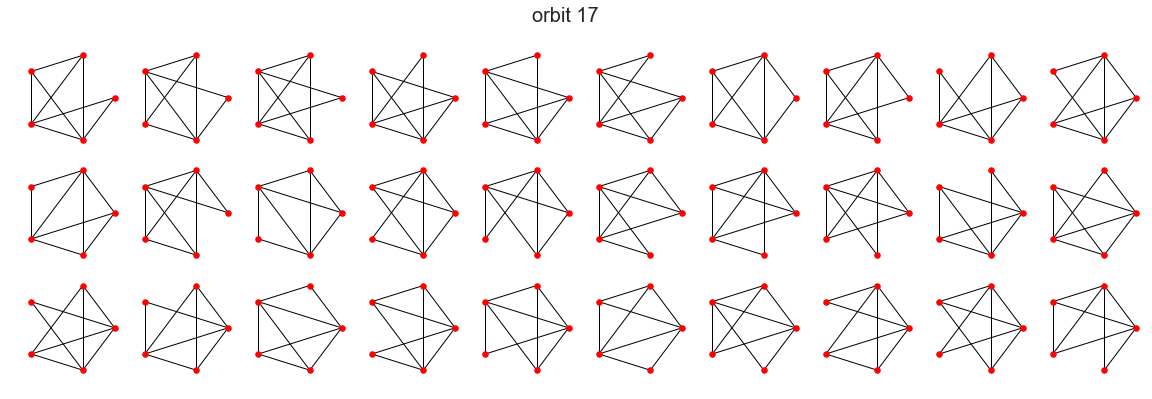

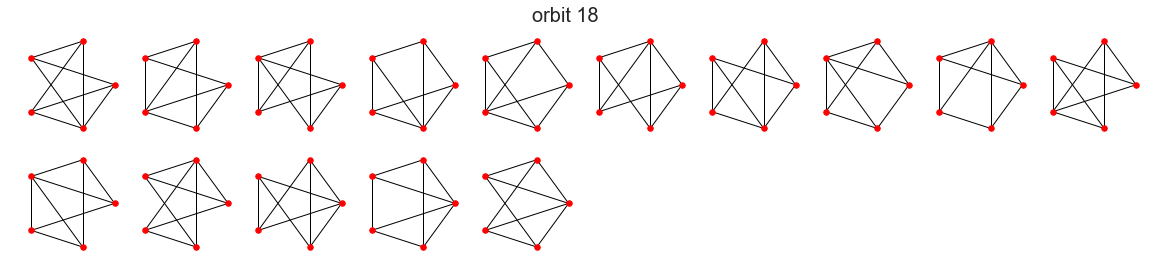

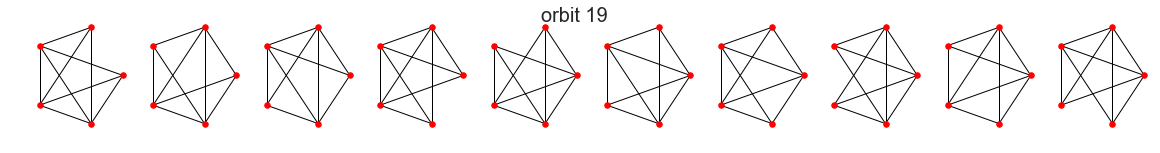

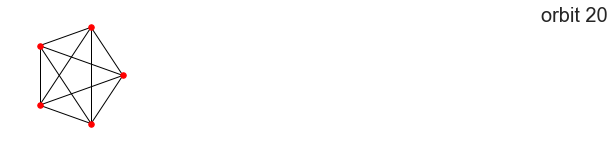

In [21]:
plot_orbits(graphs_by_orbit, n_cols=10)

## PCA on bispectrums of all 5-node graphs

In [15]:
print('number of 5-node graphs: {}'.format(len(bs5)))

number of 5-node graphs: 768


In [28]:
bs5['orbit'] = ['orbit {}'.format(x) for x in bs5.orbit]

In [32]:
sns.set_style('darkgrid')

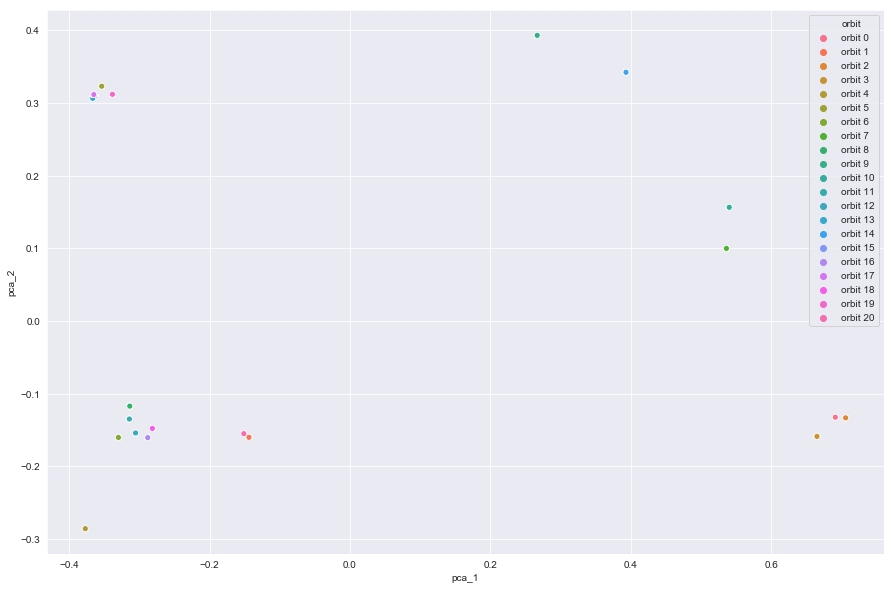

In [33]:
x = 'pca_1'
y = 'pca_2'
p1 = sns.scatterplot(x=x, y=y, data=bs5, hue='orbit')

## TSNE on bispectrums of all 5-node graphs

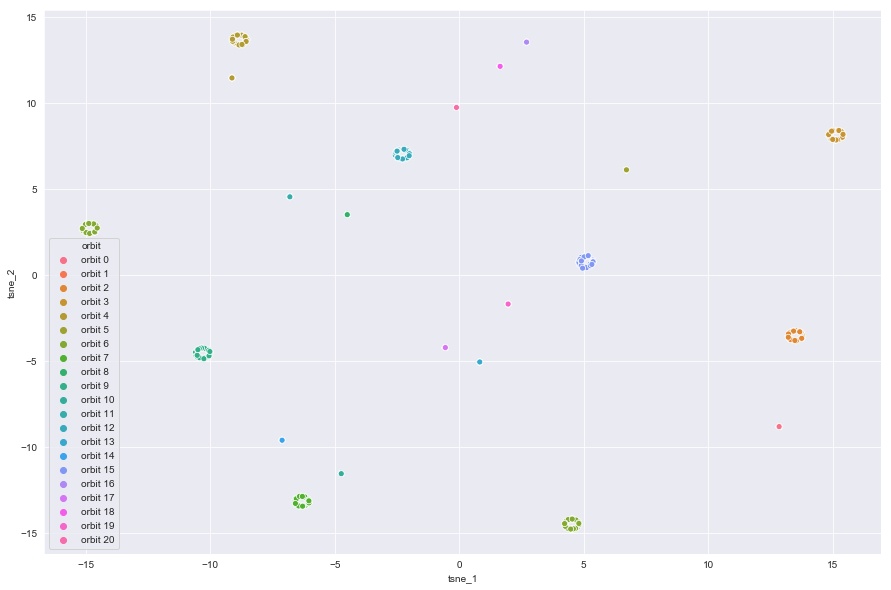

In [34]:
x = 'tsne_1'
y = 'tsne_2'
p1 = sns.scatterplot(x=x, y=y, data=bs5, hue='orbit')

# 6-node graphs

In [37]:
bs6['graph_num'] = range(len(bs6))

In [42]:
print('number of 6-node graphs: {}'.format(len(bs6)))

number of 6-node graphs: 27434


## PCA on bispectrums of all 6-node graphs

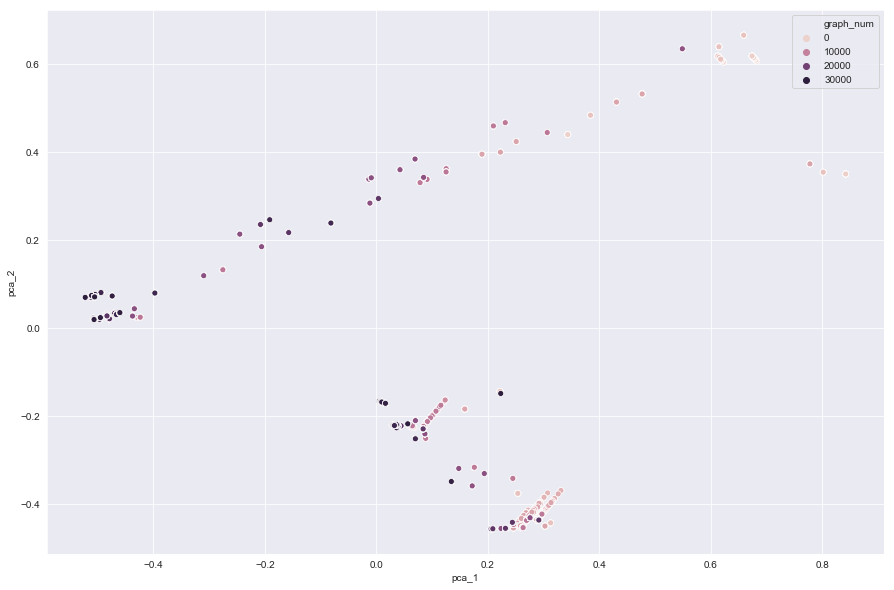

In [40]:
x = 'pca_1'
y = 'pca_2'
p1 = sns.scatterplot(x=x, y=y, data=bs6, hue='graph_num')

## TSNE on bispectrums of all 6-node graphs

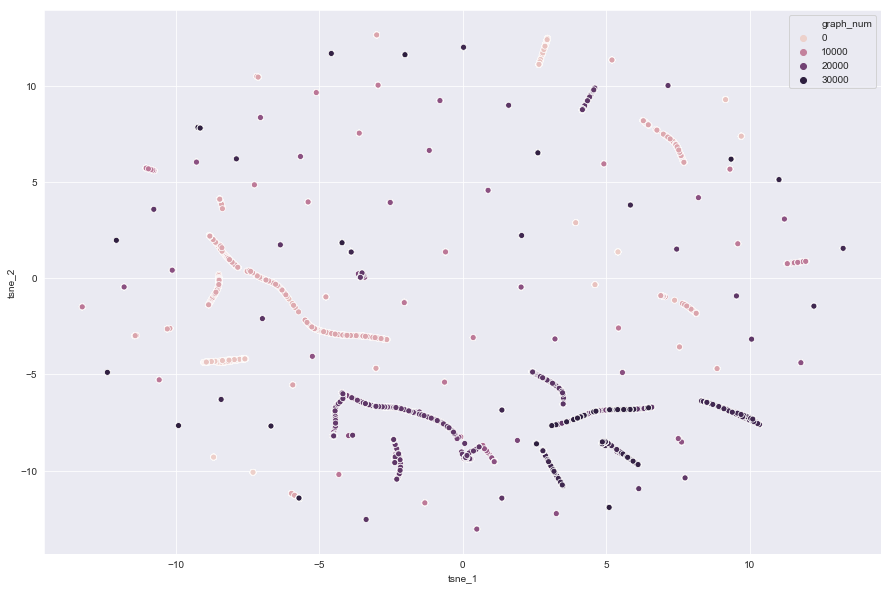

In [38]:
x = 'tsne_1'
y = 'tsne_2'
p1 = sns.scatterplot(x=x, y=y, data=bs6, hue='graph_num')

# for d in range(0, len(df)):
#      p1.text(df[x][d], df[y][d]+np.random.uniform(0, .02), df['graph_num'][d], horizontalalignment='left', size='medium', color='black')